# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *mlp.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.

## Note: you will deal with a lot of different types data in this exercise! For quick inspection and easier debugging (including when you need to ask a TA for help) use the Spyder IDE and its Variable explorer tab.

##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function imshow() to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


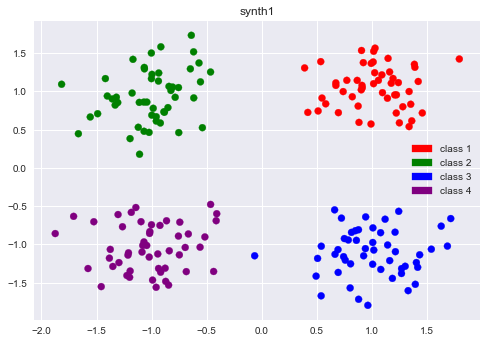

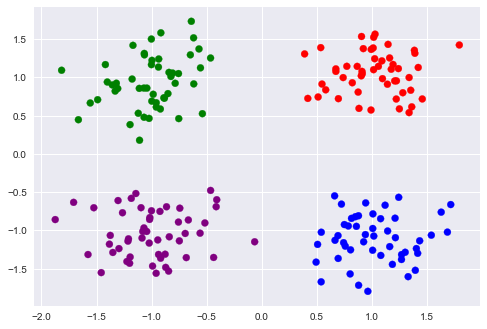

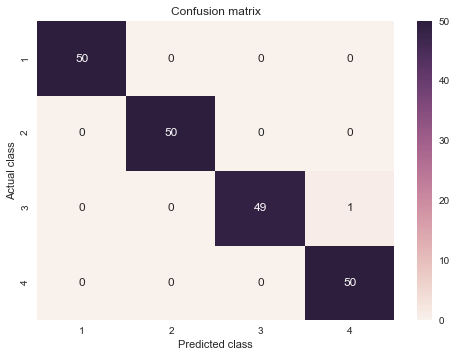

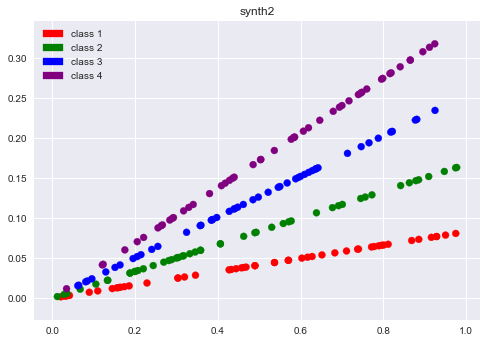

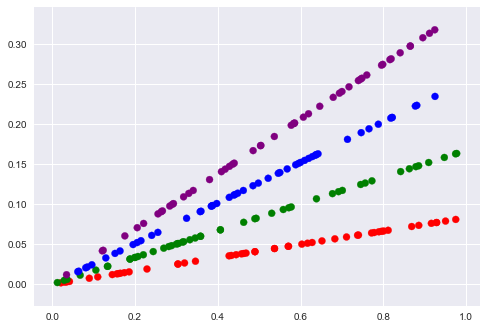

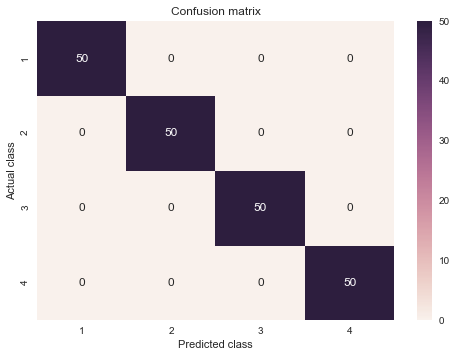

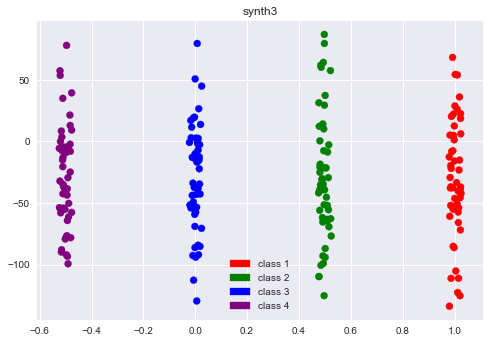

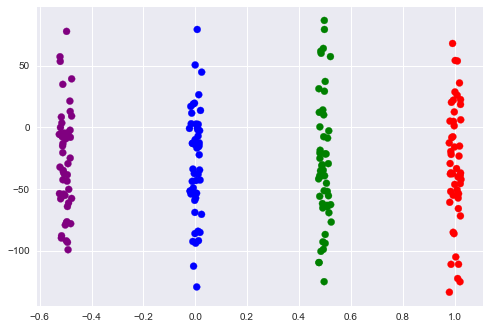

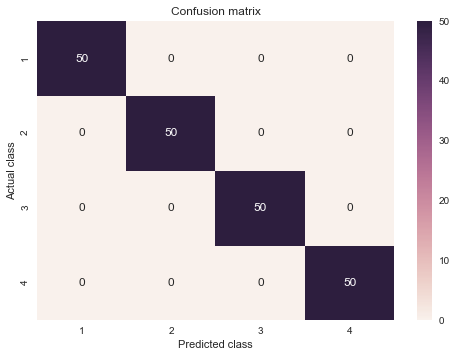

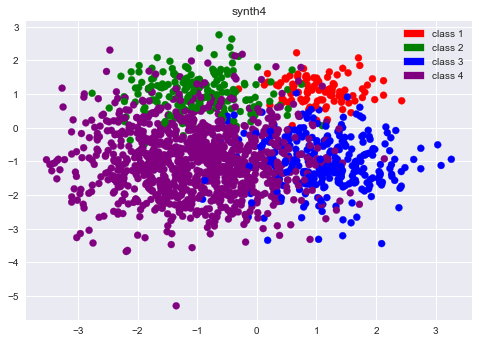

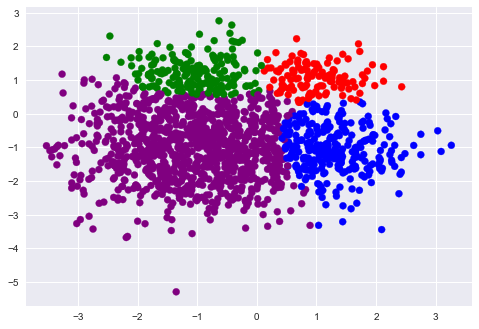

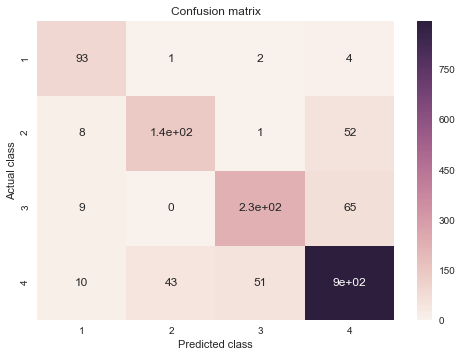

In [61]:
import seaborn as sn
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

data1 = loadmat('Data\synth1.mat')
data2 = loadmat('Data\synth2.mat')
data3 = loadmat('Data\synth3.mat')
data4 = loadmat('Data\synth4.mat')

def plot_confusion_matrix(cm,y):
    df_cm = pd.DataFrame(cm, index = [i+1 for i in np.unique(y)],
                  columns = [i+1 for i in np.unique(y)])
    plt.figure()
    sn.heatmap(df_cm, annot=True)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()


colors = ['red','green','blue','purple']
patch1 = patch.Patch(color = 'red', label = 'class 1')
patch2 = patch.Patch(color = 'green', label = 'class 2')
patch3 = patch.Patch(color = 'blue', label = 'class 3')
patch4 = patch.Patch(color = 'purple', label = 'class 4')
neigh1 = KNeighborsClassifier(n_neighbors=5, p = 1)
neigh2 = KNeighborsClassifier(n_neighbors=1, p = 1)
neigh3 = KNeighborsClassifier(n_neighbors=1, p = 1)
neigh4 = KNeighborsClassifier(n_neighbors=100, p = 1)

    
x1 = data1['X']
x1_1 = x1[:,0]
x1_2 = x1[:,1]
y1 = data1['y']
label1 = y1[:,0]
plt.scatter(x1_1, x1_2, c = label1, cmap = matplotlib.colors.ListedColormap(colors))
plt.title('synth1')
plt.legend(handles = [patch1, patch2, patch3, patch4])
plt.show()
new_class1 = neigh1.fit(x1, label1)
predict1 = new_class1.predict(x1)
plt.scatter(x1_1, x1_2, c = predict1, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

cm1 = confusion_matrix(y1, predict1)
plot_confusion_matrix(cm1 ,y1)

x2 = data2['X']
x2_1 = x2[:,0]
x2_2 = x2[:,1]
y2 = data2['y']
label2 = y2[:,0]
plt.scatter(x2_1, x2_2, c = label2, cmap = matplotlib.colors.ListedColormap(colors))
plt.title('synth2')
plt.legend(handles = [patch1, patch2, patch3, patch4])
plt.show()
new_class2 = neigh2.fit(x2, label2)
predict2 = new_class2.predict(x2)
plt.scatter(x2_1, x2_2, c = predict2, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

cm2 = confusion_matrix(y2, predict2)
plot_confusion_matrix(cm2 ,y2)

x3 = data3['X']
x3_1 = x3[:,0]
x3_2 = x3[:,1]
y3 = data3['y']
label3 = y3[:,0]
plt.scatter(x3_1, x3_2, c = label3, cmap = matplotlib.colors.ListedColormap(colors))
plt.title('synth3')
plt.legend(handles = [patch1, patch2, patch3, patch4])
plt.show()
new_class3 = neigh3.fit(x3, label3)
predict3 = new_class3.predict(x3)
plt.scatter(x3_1, x3_2, c = predict3, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

cm3 = confusion_matrix(y3, predict3)
plot_confusion_matrix(cm3 ,y3)

x4 = data4['X']
x4_1 = x4[:,0]
x4_2 = x4[:,1]
y4 = data4['y']
label4 = y4[:,0]
plt.scatter(x4_1, x4_2, c = label4, cmap = matplotlib.colors.ListedColormap(colors))
plt.title('synth4')
plt.legend(handles = [patch1, patch2, patch3, patch4])
plt.show()
new_class4 = neigh4.fit(x4, label4)
predict4 = new_class4.predict(x4)
plt.scatter(x4_1, x4_2, c = predict4, cmap = matplotlib.colors.ListedColormap(colors))
plt.show()

cm4 = confusion_matrix(y4, predict4)
plot_confusion_matrix(cm4 ,y4)

When using different distance measures, there does not seem to be a 'best' one, thus we just go for p=1 (Manhattan distance). The number of neigbours for the first one is 5, because the results in putting the one outlier (blue dot) in the right group (purple). For the second and third, we put the number of neigbours at 2, because the classes seem to already have been grouped together correctly, and a higher number changes it to something that does not appear logical. As for the final one, we used a high number of neighbours, since there are a lot of data points and therefor a high number is needed to get the best classification. 

A small number of neighbours can be used when there are not a lot of data points or you do not want the original classification to change too much or if overlapping is okay. A high number neighbours can be used for a lot of data points and if you want to form distinct groups without overlap.

accuracy:

1: (50+50+49+50)/200 = 0.995

2: (50+50+50+50)/200 = 1

3: (50+50+50+50)/200 = 1

4: (93+140+230+900)/2500 = 0.5452


error (which is 1 - accuracy):

1: 1 - 0.995 = 0.005

2: 1 - 1 = 0

3: 1 - 1 = 0

4: 1 - 0.5452 = 0.4548

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

iris = pd.read_excel('Data\iris.xls')
iris.head()
#X = iris[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']]
sepalLength = iris['Sepal Length']
sepalWidth = iris['Sepal Width']
petalLength = iris['Petal Length']
petalWidth = iris['Petal Width']
X = np.transpose([sepalLength, sepalWidth, petalLength, petalWidth])
y = np.array(iris['Type'])
y = np.transpose(np.array([str(x) for x in y]))
kmax = 40
errors = []
for k in range(1, kmax+1):
    error = 0
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neighClassifier = KNeighborsClassifier(n_neighbors = k, p = 2)
        neighClassifier.fit(X_train, y_train)
        predict = neighClassifier.predict(X_test)
        score = neighClassifier.score(X_test, y_test)
        error = error + (1.0 - score)
    errors.append((k, error))
ks = [i[0] for i in errors]
nroferrors = [j[1] for j in errors]
plt.plot(ks, nroferrors)
plt.xlabel('Number of Neighbors')
plt.ylabel('Number of Errors')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Data\\iris.xls'

*Double click to type your answer for 6.1.2 here:*
As we can see from the graph above, the best number of neighbors is at k=20 as that's the point where the lowest amount of errors is being made.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

*Double click to type your answer for 6.1.3 here:*

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class MLP contained in the `mlp.py` file can be used to create a Multilayer Perceptron that can learn weights that minimize $W = \{W_o,W_h\}$ the objective function $E(X,y,(W_o,W_h)) = \sum_i (f(W_o*f(W_h*X_i)) - y_i)$ for any dataset X with corresponding labels y. We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the MLP class in the Toolbox and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single layer perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is the sigmoid function. Why does it not make sense for an MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The function that learns the weights W mentioned above is the function `learn_weights()` which has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `nhidden`:

> `nepochs`:

> `eta`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]]).`

> `ytest = np.array([0,0,0,1]).reshape(4,1)`
     
   The command `perceptron = mlp.MLP(Xtest,ytest)` will create a instance of the MLP class. Now you can learn the weights for one hidden unit by using `wh,wo,c = perceptron.learn_weights()`. What are the weights after learning? And the classification error? use the function `perceptron.plot_boundaries(wh,wo,Xtest)` to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

##### NOTE: the weights are initiated randomly -- if the result looks strange, it may help to run the learning process again.

Iteration: 0 / 8000 ; misclassication rate: 0.7500
Iteration: 500 / 8000 ; misclassication rate: 0.2500
Iteration: 1000 / 8000 ; misclassication rate: 0.0000
Iteration: 1500 / 8000 ; misclassication rate: 0.0000
Iteration: 2000 / 8000 ; misclassication rate: 0.0000
Iteration: 2500 / 8000 ; misclassication rate: 0.0000
Iteration: 3000 / 8000 ; misclassication rate: 0.0000
Iteration: 3500 / 8000 ; misclassication rate: 0.0000
Iteration: 4000 / 8000 ; misclassication rate: 0.0000
Iteration: 4500 / 8000 ; misclassication rate: 0.0000
Iteration: 5000 / 8000 ; misclassication rate: 0.0000
Iteration: 5500 / 8000 ; misclassication rate: 0.0000
Iteration: 6000 / 8000 ; misclassication rate: 0.0000
Iteration: 6500 / 8000 ; misclassication rate: 0.0000
Iteration: 7000 / 8000 ; misclassication rate: 0.0000
Iteration: 7500 / 8000 ; misclassication rate: 0.0000
Final misclassification rate: 0.0000
[[ 4.8002676  -4.88410596 -4.88410527]]
[[-6.14938323]]
0.0


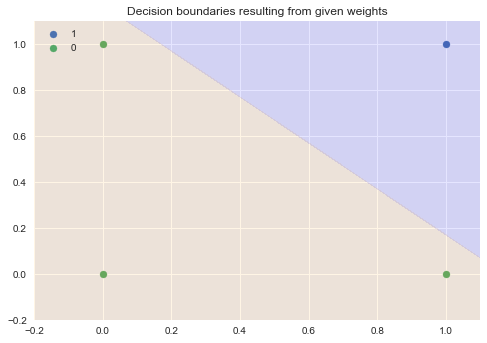

In [37]:
import mlp
from mlp import MLP

Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])
ytest = np.array([0,0,0,1]).reshape(4,1)
perc = MLP(Xtest,ytest)
w1,w2,c = perc.learn_weights(nhidden=1)
print(w1)
print(w2)
print(c)
perc.plot_boundaries(w1,w2,Xtest)

1: When using a linear activation function for an MLP, the data is linearly seperable, eliminating the need of an hidden layer and leaving only the input and output layer.

2: 
nhidden: the resulting solution will get better the more hidden layers are used, so a higher value returns better results.

nepochs: the number of leaning steps causes the training to take longer (more steps) or go faster (less steps), and using more steps would logically result in a better trained network and thus better results.

eta: changing the learning rate changes 'how well' the network is trained. A lower value means slower, more linear, learning but less decay, while a higher rate means faster, exponential, leaning but high decay. It is hard to say what values give better results, but most of the time the value should not be high. 

3:
The classification error after leaning is 0.0000 and the weights are -6.20953342, 4.80790798, -4.90132966 and -4.90132901. It works well with one hidden unit because the data is easy to seperate. Using more hidden layers will not mean improvement for this particular data set.

#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make a scatter plot of the two attributes in `X`, coloring the points according to the class label `y`. How are `X` and `y` related?

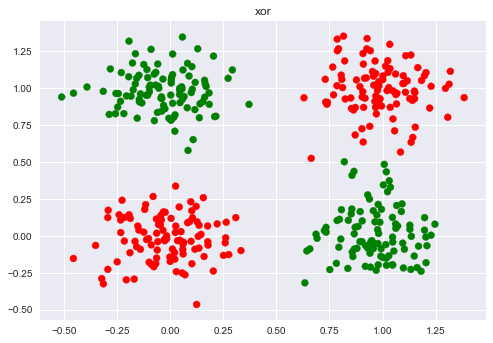

In [86]:
xor = scipy.io.loadmat('Data/xor.mat')
colors = ['red','green']
x = xor['X']
x1 = x[:,0]
x2 = x[:,1]
y = xor['y']
label1 = y[:,0]
plt.scatter(x1, x2, c = label1, cmap = matplotlib.colors.ListedColormap(colors))
plt.title('xor')
plt.legend()
plt.show()

In XOR truth tablse, if both inputs are the same (both true or both false), the output is false. If the two input values are different (one true and one false), the output is true. Here, y is the output and x provides the two input values. In this scenario, we replace 'true' with values below 0.50 and 'false' above 0.50. if both values are 'false' or both are 'true' they are classified as one group, and if they have a 'true' and a 'false' value they are classified in the other one. 

You will now use the MLP class to create and learn the weights of a mlp. The constructor `mlp.MLP(X,y)` takes 2 arguments, X and y. Save the instance you created in a variable `perceptron`. The function `learn_weights()` will return the weights between the input layer and hidden layer, `W_h`, the weights between the hidden layer and the output layer, `W_o`, and the classification error  


#### 6.2.3 (2 points)
Create a MLP using X and y. Learn the weights `Wh,Wo` using 1 hidden unit. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. Since the algorithm doesn't always converge, restart the learning process 5 times in each fold and take the best classification error.  

You can get the training error from the `learn_weights()` function. Set the optional parameter `verbose=False` to prevent cluttering the output with print statements. The test error can be obtained by feeding the test data through the network using the function `forwardprop(W_h,W_o,X=X_test)`. `forwardprop` will then return a few variables (h,o,grad_h,grad_o, and y_hat), of which the last is the output of the network. You can compare this output `y_hat` to the actual labels in `y_test`. So:

>`_,_,_,_,y_hat = perceptron.forwardprop(Wh,Wo,X=X_test)
> test_error = ... #compare y_hat to y_test`




Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

*Double click to type your answer for 6.2.3 here:*


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

*Double click to type your answer for 6.2.4 here:*


#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

*Double click to type your answer for 6.2.5 here:*
